In [ ]:
notebook_dir = %pwd                                                     
%matplotlib inline                               
import pysces                                                           
import psctb                                                            
import numpy                                                            
from os import path                                                     
from IPython.display import display, Image                              
from sys import platform                                                

# RateChar

RateChar is a tool for performing generalised supply-demand analysis (GSDA) [[2,3]](references.html). This entails the generation data needed to draw rate characteristic plots for all the variable species of metabolic model through parameter scans and the subsequent visualisation of these data in the form of `ScanFig` objects.

## Features

* Performs parameter scans for any variable species of a metabolic model
* Stores results in a structure similar to `Data2D`.
* Saving of raw parameter scan data, together with metabolic control analysis results to disk.
* Saving of `RateChar` sessions to disk for later use.
* Generates rate characteristic plots from parameter scans (using `ScanFig`).
* Can perform parameter scans of any variable species with outputs for relevant response, partial response, elasticity and control coefficients (with data stores as `Data2D` objects).

## Usage and Feature Walkthrough

### Workflow

Performing GSDA with `RateChar` usually requires taking the following steps:

1. Instantiation of `RateChar` object (optionally specifying default settings).
2. Performing a configurable parameter scan of any combination of variable species (or loading previously saved results).
3. Accessing scan results through `RateCharData` objects corresponding to the names of the scanned species that can be found as attributes of the instantiated `RateChar` object. 
4. Plotting results of a particular species using the `plot` method of the `RateCharData` object corresponding to that species. 
5. Further analysis using the `do_mca_scan` method. 
6. Session/Result saving if required.
7. Further Analysis

.. note:: Parameter scans are performed for a range of concentrations values between two set values. By default the minimum and maximum scan range values are calculated relative to the steady state concentration the species for which a scan is performed respectively using a division and multiplication factor. Minimum and maximum values may also be explicitly specified. Furthermore the number of points for which a scan is performed may also be specified. Details of how to access these options will be discussed below. 

### Object Instantiation

Like most tools provided in PySCeSToolbox, instantiation of a `RateChar` object requires a pysces model object (`PysMod`) as an argument. A `RateChar` session will typically be initiated as follows (here we will use the included [lin4_fb.psc](included_files.html#lin4-fb-hill-psc) model):

In [2]:
mod = pysces.model('lin4_fb.psc')
rc = psctb.RateChar(mod)

Using model directory: /home/carl/Pysces/psc
/home/carl/Pysces/psc/lin4_fb.psc loading ..... 
Parsing file: /home/carl/Pysces/psc/lin4_fb.psc
Info: "X4" has been initialised but does not occur in a rate equation
 
Calculating L matrix . . . . . . .  done.
Calculating K matrix . . . . . . .  done.
 


Default parameter scan settings relating to a specific `RateChar` session can also be specified during instantiation:

In [3]:
rc = psctb.RateChar(mod,min_concrange_factor=100,
                    max_concrange_factor=100,
                    scan_points=255,
                    auto_load=False)

* `min_concrange_factor` : The steady state division factor for calculating scan range minimums *(default: 100)*.
* `max_concrange_factor` : The steady state multiplication factor for calculating scan range maximums *(default: 100)*.
* `scan_points` : The number of concentration sample points that will be taken during parameter scans *(default: 256)*.
* `auto_load` : If `True` `RateChar` will try to load saved data from a previous session during instantiation. Saved data is unaffected by the above options and are only subject to the settings specified during the session where they were generated.  *(default:* `False`*)*.

The settings specified with these optional arguments take effect when the corresponding arguments are not specified during a parameter scan. 

### Parameter Scan

After object instantiation, parameter scans may be performed for any of the variable species using the `do_ratechar` method. By default `do_ratechar` will perform parameter scans for all variable metabolites using the settings specified during instantiation. For saving/loading see [Saving/Loading Sessions](RateChar.ipynb#saving-loading-sessions) below.

In [4]:
mod.species

('S1', 'S2', 'S3')

In [5]:
rc.do_ratechar()

Various optional arguments, similar to those used during object instantiation, can be used to override the default settings and customise any parameter scan:

* `fixed` : A string or list of strings specifying the species for which to perform a parameter scan. The string `'all'` specifies that all variable species should be scanned. *(default: `all`)*
* `scan_min` : The minimum value of the scan range, overrides `min_concrange_factor` *(default: None)*.
* `scan_max` : The maximum value of the scan range, overrides `max_concrange_factor` *(default: None)*.
* `min_concrange_factor` : The steady state division factor for calculating scan range minimums *(default: None)*
* `max_concrange_factor` : The steady state multiplication factor for calculating scan range maximums *(default: None)*.
* `scan_points` : The number of concentration sample points that will be taken during parameter scans *(default: None)*.
* `solver` : An integer value that specifies which solver to use (0:Hybrd,1:NLEQ,2:FINTSLV). *(default: 0)*.

.. note:: For details on different solvers see the [PySCeS documentation](http://pysces.sourceforge.net/docs/userguide_doc.html#steady-state-analysis): 

For example in a scenario where we only wanted to perform parameter scans of 200 points for the metabolites `S1` and `S3` starting at a value of 0.02 and ending at a value 110 times their respective steady-state values the method would be called as follows:

In [6]:
rc.do_ratechar(fixed=['S1','S3'], scan_min=0.02, max_concrange_factor=110, scan_points=200)

### Accessing Results
#### Parameter Scan Results

Parameter scan results for any particular species are saved as an attribute of the `RateChar` object under the name of that species. These `RateCharData` objects are similar to `Data2D` objects with parameter scan results being accessible through a `scan_results` DotDict:

In [7]:
# Each key represents a field through which results can be accessed
sorted(rc.S3.scan_results.keys())

['J_R3',
 'J_R4',
 'ecR3_S3',
 'ecR4_S3',
 'ec_data',
 'ec_names',
 'fixed',
 'fixed_ss',
 'flux_data',
 'flux_max',
 'flux_min',
 'flux_names',
 'prcJR3_S3_R1',
 'prcJR3_S3_R3',
 'prcJR3_S3_R4',
 'prcJR4_S3_R1',
 'prcJR4_S3_R3',
 'prcJR4_S3_R4',
 'prc_data',
 'prc_names',
 'rcJR3_S3',
 'rcJR4_S3',
 'rc_data',
 'rc_names',
 'scan_max',
 'scan_min',
 'scan_points',
 'scan_range',
 'total_demand',
 'total_supply']

.. note:: The `DotDict` data structure is essentially a dictionary with additional functionality for displaying results in table form (when appropriate) and for accessing data using dot notation in addition the normal dictionary bracket notation. 

In the above dictionary-like structure each field can represent different types of data, the most simple of which is a single value, e.g., `scan_min` and `fixed`, or a 1-dimensional numpy ndarray which represent input (`scan_range`) or output (`J_R3`, `J_R4`, `total_supply`):

In [8]:
# Single value results

# scan_min value
rc.S3.scan_results.scan_min

0.020000000000000004

In [9]:
# fixed metabolite name
rc.S3.scan_results.fixed

'S3'

In [10]:
# 1-dimensional ndarray results (only every 10th value of 200 value arrays)

# scan_range values
rc.S3.scan_results.scan_range[::10]

array([  2.00000000e-02,   3.42884038e-02,   5.87847316e-02,
         1.00781731e-01,   1.72782234e-01,   2.96221349e-01,
         5.07847861e-01,   8.70664626e-01,   1.49268501e+00,
         2.55908932e+00,   4.38735439e+00,   7.52176893e+00,
         1.28954725e+01,   2.21082584e+01,   3.79028445e+01,
         6.49814018e+01,   1.11405427e+02,   1.90995713e+02,
         3.27446907e+02,   5.61381587e+02])

In [11]:
# J_R3 values for scan_range
rc.S3.scan_results.J_R3[::10]

array([ 199.95837618,  199.95793443,  199.95717575,  199.95586349,
        199.95351373,  199.94862132,  199.93277067,  199.84116362,
        199.13023486,  193.32039795,  154.71345957,   58.57037566,
         12.34220931,    4.95993525,    4.0627301 ,    3.94870431,
          3.91873852,    3.88648387,    3.83336626,    3.74248032])

In [12]:
# total_supply values for scan_range
rc.S3.scan_results.total_supply[::10]

# Note that J_R3 and total_supply are equal in this case, because S3 
# only has a single supply reaction

array([ 199.95837618,  199.95793443,  199.95717575,  199.95586349,
        199.95351373,  199.94862132,  199.93277067,  199.84116362,
        199.13023486,  193.32039795,  154.71345957,   58.57037566,
         12.34220931,    4.95993525,    4.0627301 ,    3.94870431,
          3.91873852,    3.88648387,    3.83336626,    3.74248032])

Finally data needed to draw lines relating to metabolic control analysis coefficients are also included in `scan_results`. Data is supplied in 3 different forms: Lists names of the coefficients (under `ec_names`, `prc_names`, etc.), 2-dimensional arrays with exactly 4 values (representing 2 sets of x,y coordinates) that will be used to plot coefficient lines, and 2-dimensional array that collects coefficient line data for each coefficient type into single arrays (under `ec_data`, `prc_names`, etc.). 


In [13]:
# Metabolic Control Analysis coefficient line data

# Names of elasticity coefficients related to the 'S3' parameter scan
rc.S3.scan_results.ec_names

['ecR4_S3', 'ecR3_S3']

In [14]:
# The x, y coordinates for two points that will be used to plot a 
# visual representation of ecR3_S3
rc.S3.scan_results.ecR3_S3

array([[   7.74367648,  166.89714142],
       [   8.87554125,   11.92812809]])

In [15]:
# The x,y coordinates for two points that will be used to plot a 
# visual representation of ecR4_S3
rc.S3.scan_results.ecR4_S3

array([[  2.77554202,  39.66048804],
       [ 24.76248588,  50.19530973]])

In [16]:
# The ecR3_S3 and ecR4_S3 data collected into a single array 
# (horizontally stacked).
rc.S3.scan_results.ec_data

array([[   2.77554202,   39.66048804,    7.74367648,  166.89714142],
       [  24.76248588,   50.19530973,    8.87554125,   11.92812809]])

#### Metabolic Control Analysis Results

The in addition to being able to access the data that will be used to draw rate characteristic plots, the user also has access to the values of the metabolic control analysis coefficient values at the steady state of any particular species  via the `mca_results` field. This field represents a `DotDict` dictionary-like object (like `scan_results`), however as each key maps to exactly one result, the data can be displayed as a table (see [Basic Usage](basic_usage.html#tables)):

In [17]:
# Metabolic control analysis coefficient results 
rc.S3.mca_results

$C^{JR3}_{R1}$,1.000
$C^{JR3}_{R3}$,4.612e-05
$C^{JR3}_{R4}$,0.000
$C^{JR4}_{R1}$,0.000
$C^{JR4}_{R3}$,0.000
$C^{JR4}_{R4}$,1.000
$\varepsilon^{R1}_{S3}$,-2.888
$\varepsilon^{R3}_{S3}$,-19.340
$\varepsilon^{R4}_{S3}$,0.108
"$\,^{R1}R^{JR3}_{S3}$",-2.888
"$\,^{R3}R^{JR3}_{S3}$",-8.921e-04


Naturally, coefficients can also be accessed individually:

In [18]:
# Control coefficient ccJR3_R1 value
rc.S3.mca_results.ccJR3_R1

0.99986784585886035

### Plotting Results

One of the strengths of generalised supply-demand analysis is that it provides an intuitive visual framework for inspecting results through the used of rate characteristic plots. Naturally this is therefore the main focus of RateChar. Parameter scan results for any particular species can be visualised as a `ScanFig` object through the `plot` method:



In [19]:
# Rate characteristic plot for 'S3'.
S3_rate_char_plot = rc.S3.plot()

Plots generated by `RateChar` do not have widgets for each individual line; lines are enabled or disabled in batches according to the category they belong to. By default the `Fluxes`, `Demand` and `Supply` categories are enabled when plotting.  To display the partial response coefficient lines together with the flux lines for `J_R3`, for instance, we would click the `J_R3` and the `Partial Response Coefficients` buttons (in addition to those that are enabled by default).



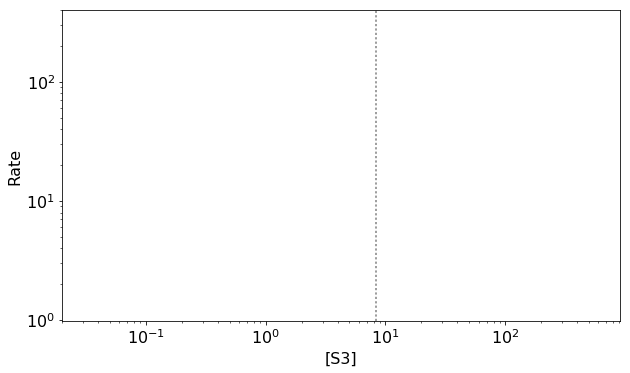

In [20]:
# Display plot via `interact` and enable certain lines by clicking category buttons.

# The two method calls below are equivalent to clicking the 'J_R3'
# and 'Partial Response Coefficients' buttons:
# S3_rate_char_plot.toggle_category('J_R3',True)
# S3_rate_char_plot.toggle_category('Partial Response Coefficients',True)

S3_rate_char_plot.interact()


Modifying the status of individual lines is still supported, but has to take place via the `toggle_line` method. As an example `prcJR3_C_R4` can be disabled as follows:

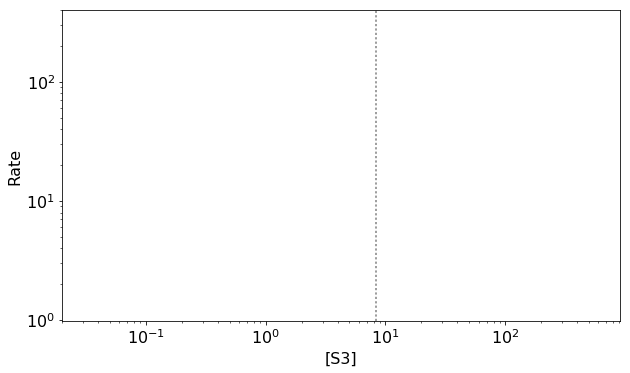

In [22]:
S3_rate_char_plot.toggle_line('prcJR3_S3_R4', False)
S3_rate_char_plot.show()

.. note:: For more details on saving see the sections [Saving and Default Directories](basic_usage.html#saving-and-default-directories) and [ScanFig](basic_usage.html#scanfig) under Basic Usage.

### Saving 
#### Saving/Loading Sessions

RateChar sessions can be saved for later use. This is especially useful when working with large data sets that take some time to generate. Data sets can be saved to any arbitrary location by supplying a path:

In [23]:
# This points to a file under the Pysces directory 
save_file = '~/Pysces/rc_doc_example.npz'

# Correct path depending on platform - necessary for platform independent scripts
if platform == 'win32':
    save_file = psctb.utils.misc.unix_to_windows_path(save_file)
else:
    save_file = path.expanduser(save_file)
    
rc.save_session(file_name = save_file)

When no path is supplied the dataset will be saved to the default directory. (Which should be "~/Pysces/lin4_fb/ratechar/save_data.npz" in this case.

In [24]:
rc.save_session() # to "~/Pysces/lin4_fb/ratechar/save_data.npz"

Similarly results may be loaded using the `load_session` method, either with or without a specified path:

In [25]:
rc.load_session(save_file)
# OR
rc.load_session() # from "~/Pysces/lin4_fb/ratechar/save_data.npz"

#### Saving Results

Results may also be exported in csv format either to a specified location or to the default directory. Unlike saving of sessions results are spread over multiple files, so here an existing folder must be specified:

In [26]:
# This points to a subdirectory under the Pysces directory
save_folder = '~/Pysces/lin4_fb/'

# Correct path depending on platform - necessary for platform independent scripts
if platform == 'win32':
    save_folder = psctb.utils.misc.unix_to_windows_path(save_folder)
else:
    save_folder = path.expanduser(save_folder)
    
rc.save_results(save_folder)

A subdirectory will be created for each metabolite with the files `ec_results_N`, `rc_results_N`, `prc_results_N`, `flux_results_N` and `mca_summary_N` (where `N` is a number starting at "0" which increments after each save operation to prevent overwriting files). 

In [27]:
# Otherwise results will be saved to the default directory 
rc.save_results(save_folder) # to sub folders in "~/Pysces/lin4_fb/ratechar/

Alternatively the methods `save_coefficient_results`, `save_flux_results`, `save_summary` and `save_all_results` belonging to individual `RateCharData` objects can be used to save the individual result sets. 